# Linear Regression at Codecademy
For this project, you’ll get to work as a data analyst alongside the curriculum team at Codecademy to help us improve the learner experience. While this data is simulated, it is similar to real data that we might want to investigate as Codecademy team members!

Note that a solution.py file is loaded for you in the workspace, which contains solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or want to check your answers when you’re done!

Finally, a quick note about plotting: in order to prevent plots from getting layered on top of each other, you’ll need to show then clear each plot before creating the next one using the following code:

plt.show() # Show the plot
plt.clf() # Clear the plot

Note: clearing the plot will not erase it — it will just create a new plot for the next graphic.

Let’s get started!

data file: codecademy.csv

A dataset has been loaded for you in script.py and saved as a dataframe named codecademy. We’re imagining that this data was collected as part of an experiment to understand factors that contribute to learner performance on a quiz. The data contains three columns:
- score: student score on a quiz
- completed: the number of other content items on Codecademy that the learner has completed prior to this quiz
- lesson: indicates which lesson the learner took directly before the quiz ('Lesson A' or 'Lesson B')
Take a look at this dataset by printing the first five rows.

In [5]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [6]:
# Read in the data
codecademy = pd.read_csv('codecademy.csv')
# Print the first five rows
print(codecademy.head())

   score  completed    lesson
0   82.7         35  Lesson A
1   65.2         31  Lesson A
2   55.3         33  Lesson A
3   28.8         25  Lesson B
4   31.2         18  Lesson B


## Model the relationship between quiz score and number of completed content items
Plot a scatter plot of score (y-axis) against completed (x-axis) to see the relationship between quiz score and number of completed content items.
Is there a relationship between these two variables, and does it appear to be linear?

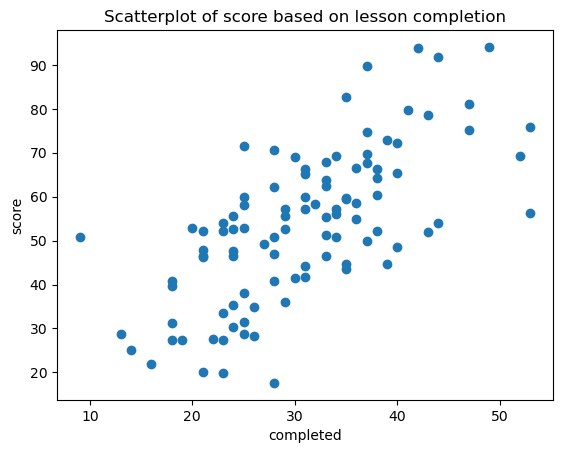

<Figure size 640x480 with 0 Axes>

In [9]:
# Create a scatter plot of score vs completed
plt.scatter(codecademy.completed, codecademy.score)
plt.xlabel('completed')
plt.ylabel('score')
plt.title('Scatterplot of score based on lesson completion')
plt.show() # Show the plot
plt.clf() # Clear the plot
# there is a positive linear relationship between both quantitative variables

In [11]:
# Fit a linear regression to predict score based on prior lessons completed
model = sm.OLS.from_formula('score ~ completed', data = codecademy)
results = model.fit()
print(results.params)
# Intercept interpretation:
# students who didn't complete a lesson are predicted to average a score of 13.21 on the quizz
# Slope interpretation:
# for every lesson completed, students will increase their quizz score by 1.3 on average

Intercept    13.214113
completed     1.306826
dtype: float64


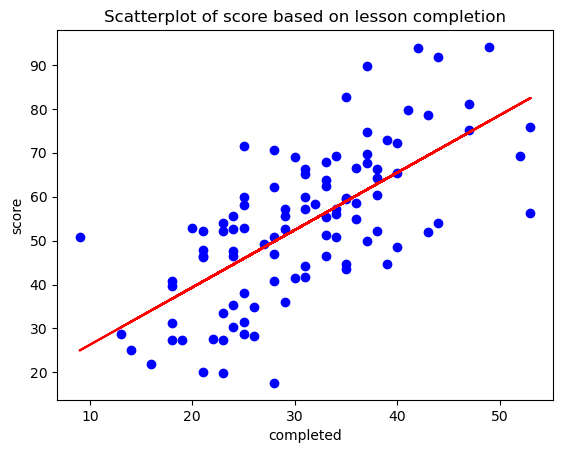

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot the scatter plot with the line on top
plt.scatter(codecademy.completed, codecademy.score, color = 'blue')
plt.plot(codecademy.completed, results.params[0] + results.params[1]*codecademy.completed, color = 'red')
plt.xlabel('completed')
plt.ylabel('score')
plt.title('Scatterplot of score based on lesson completion')
plt.show() # Show the plot
plt.clf() # Clear the plot
# the line fits well the data

In [15]:
# Predict score for learner who has completed 20 prior lessons
pred_20 = results.params[1]*20 + results.params[0]
print(pred_20) # 39.35

39.35062487732294


In [17]:
# Calculate fitted values
fitted_values = results.predict(codecademy)
print(fitted_values.head())

0    58.953009
1    53.725706
2    56.339358
3    45.884753
4    36.736974
dtype: float64


In [19]:
# Calculate residuals
residuals = codecademy.score - fitted_values
print(residuals.head())

0    23.746991
1    11.474294
2    -1.039358
3   -17.084753
4    -5.536974
dtype: float64


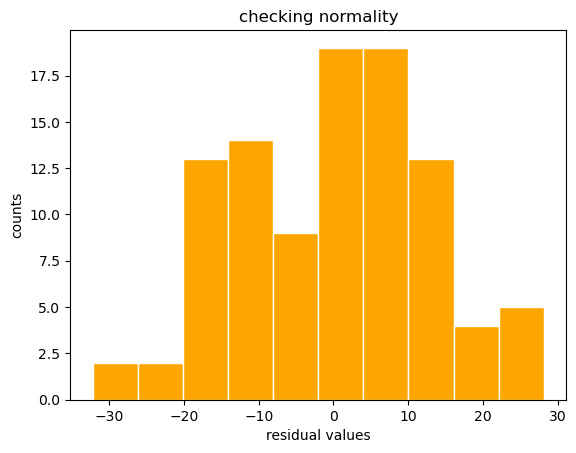

<Figure size 640x480 with 0 Axes>

In [23]:
# Check normality assumption
plt.hist(residuals, color = 'orange', edgecolor='white')
plt.xlabel('residual values')
plt.ylabel('counts')
plt.title('checking normality') # residuals look normally distributed
plt.show()
plt.clf()

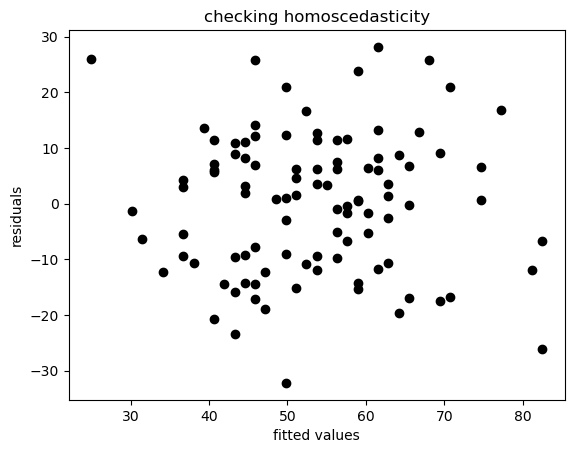

<Figure size 640x480 with 0 Axes>

In [25]:
# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals, color = 'black')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.title('checking homoscedasticity') # the homoscedasticity is fulfilled
plt.show()
plt.clf()

## Do learners who take lesson A or B perform better on the quiz?
Let’s now turn our attention to the lessons column to see if learners who took different lessons scored differently on the quiz.  
Use sns.boxplot to create a boxplot of score (y-variable) for each lesson (x-variable) to see the relationship between quiz score and which lesson the learner completed immediately before taking the quiz.   
Does one lesson appear to do a better job than the other of preparing students for this quiz? If so, which one?

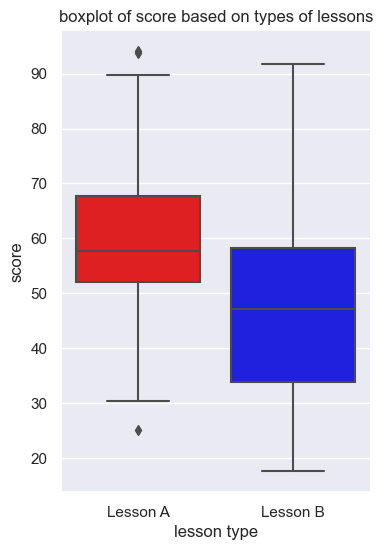

<Figure size 400x600 with 0 Axes>

In [27]:
# Create a boxplot of score vs lesson
sns.set(font_scale = 1)
sns.set_theme(rc={'figure.figsize':(4,6)})
sns.boxplot(x = 'lesson', y = 'score', data = codecademy, palette=['red','blue'])
plt.xlabel('lesson type')
plt.ylabel('score')
plt.title('boxplot of score based on types of lessons') # 
plt.show()
plt.clf()
# lesson A achieves higher scores

In [29]:
# Fit a linear regression to predict score based on which lesson they took (binary variable A or B)
model2 = sm.OLS.from_formula('score ~ lesson', data = codecademy)
results2 = model2.fit()
print(results2.params)

Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64


In [31]:
#print(codecademy.head())
# Calculate and print the group means (for comparison)
A_score_mean = np.mean(codecademy.score[codecademy.lesson == 'Lesson A'])
print(A_score_mean) # 59.2
B_score_mean = np.mean(codecademy.score[codecademy.lesson == 'Lesson B'])
print(B_score_mean) # 47.6
# compute the mean difference and compare to slope
print(A_score_mean - B_score_mean) # 11.642
print(B_score_mean - A_score_mean) # -11.642 = slope

59.220000000000006
47.578
11.642000000000003
-11.642000000000003


## Next steps
Congratulations! You’ve used a simple linear model to understand how quiz scores are related to other learner actions.   
In this project, we’ve focused on modeling the relationship between quiz score and one other variable at a time (first we looked at completed, then we looked at lesson separately).  
The next step in linear regression is to model quiz scores as a function of multiple other variables at once! To get a preview of what this might look like visually, let’s try using seaborn‘s lmplot() function to plot a scatter plot of score vs. completed, colored by lesson. For context, the lm in lmplot() stands for “linear model”.   
This function will automatically plot a linear regression model on top of the scatter plot. The code to implement this looks like:  
sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', data = codecademy)  
plt.show()  
Note that when we include a third variable in our plot using the hue parameter (which controls the color of each point in the scatter plot), something interesting happens! All of a sudden, we end up with multiple regression lines.   
To find out how to fit and interpret this model, you’ll have to continue learning about linear regression!

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x600 with 0 Axes>

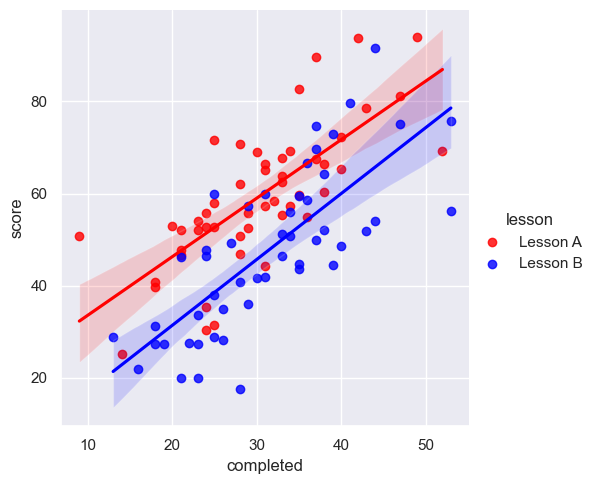

In [33]:
# Use `sns.lmplot()` to plot `score` vs. `completed` colored by `lesson`
plt.tight_layout()
sns.set(font_scale = 1)
sns.set_theme(rc={'figure.figsize':(6,6)})
sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', palette = ['red','blue'], data = codecademy)
plt.show()